<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-04-18 17:06:50--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
connected. to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... 
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  20.7MB/s    in 17s     

2025-04-18 17:07:07 (12.0 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 119.1 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 129.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 132.8 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


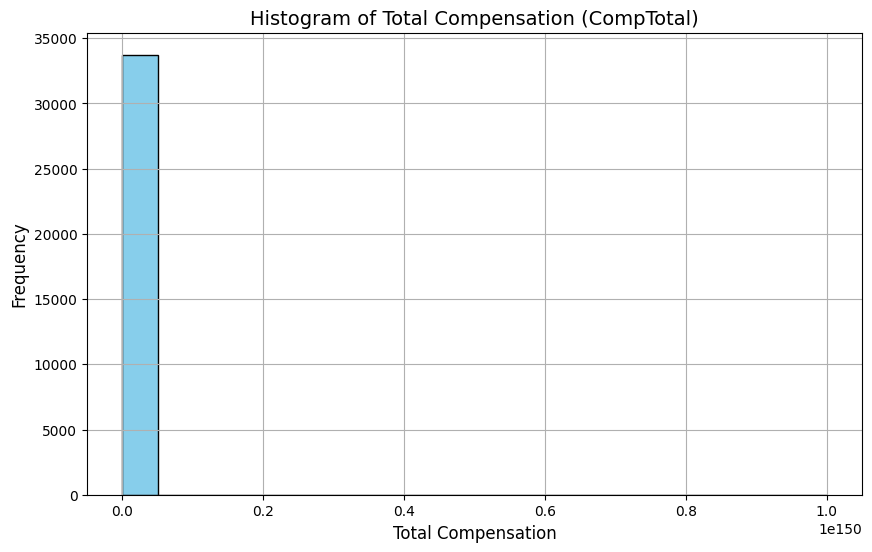

In [9]:
QUERY = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"

# Read the query result into a DataFrame
df = pd.read_sql_query(QUERY, conn)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
# Plot a histogram of the 'CompTotal' column
plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'], bins=20, edgecolor='black', color='skyblue')
plt.title('Histogram of Total Compensation (CompTotal)', fontsize=14)
plt.xlabel('Total Compensation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


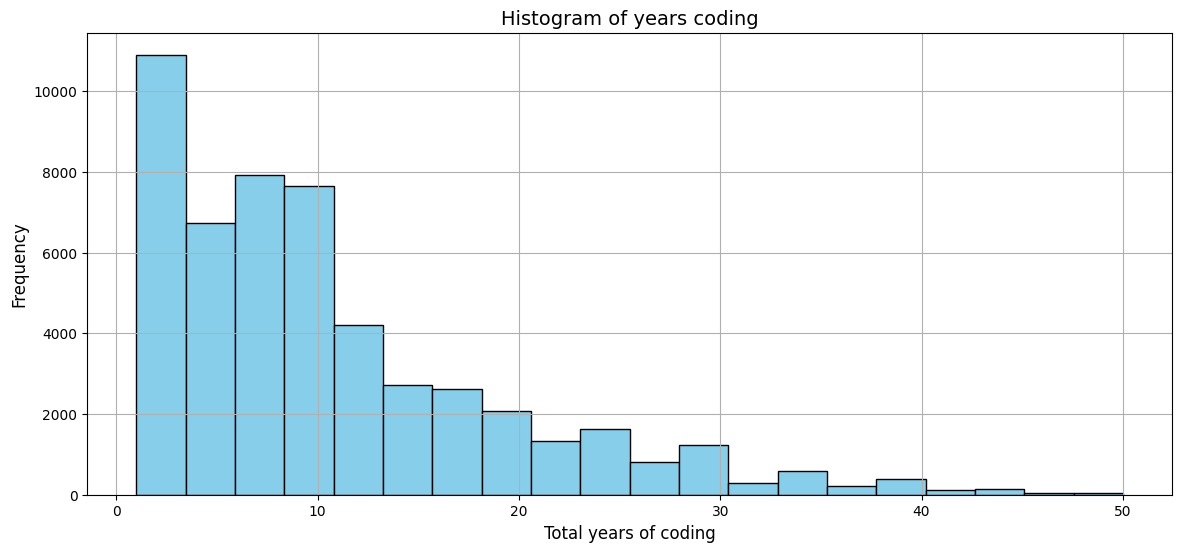

In [10]:
QUERY = "SELECT YearsCodePro FROM main WHERE YearsCodePro IS NOT NULL"

# Read the query result into a DataFrame
df = pd.read_sql_query(QUERY, conn)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

df['YearsCodePro'] = df['YearsCodePro'].fillna(df['YearsCodePro'].mean())

# Plot a histogram of the 'YearsCodePro' column
plt.figure(figsize=(14, 6))
plt.hist(df['YearsCodePro'], bins=20, edgecolor='black', color='skyblue')
plt.title('Histogram of years coding', fontsize=14)
plt.xlabel('Total years of coding', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


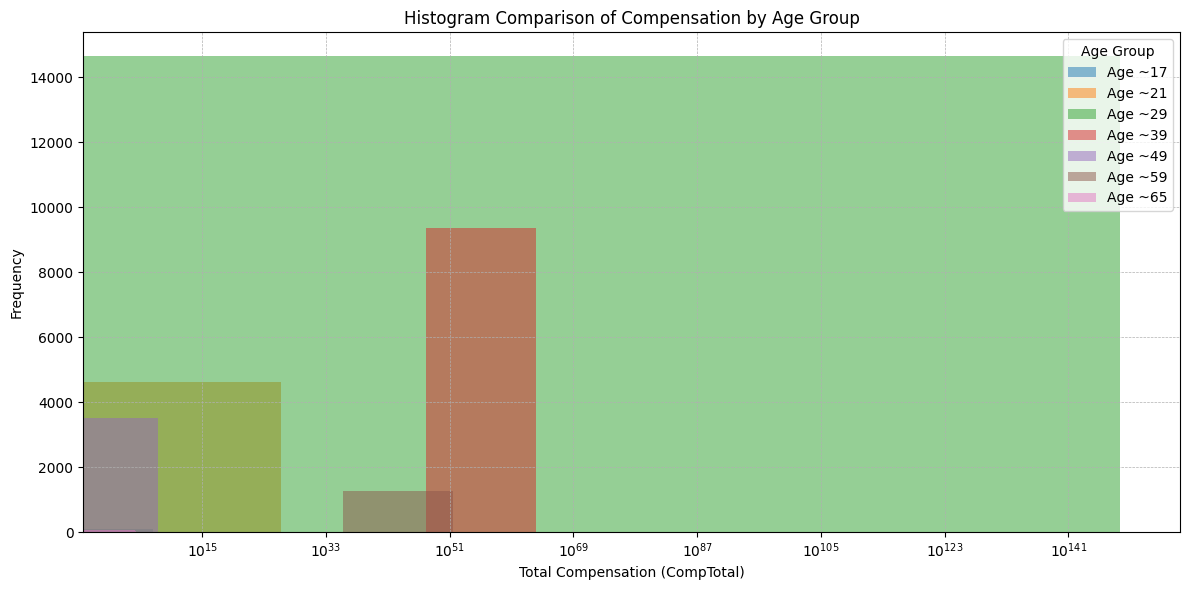

In [14]:
conn = sqlite3.connect('survey-data.sqlite')
# Query relevant data
query = "SELECT Age, CompTotal FROM main WHERE Age IS NOT NULL AND CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Convert CompTotal to numeric (some values might be text)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])

# Map Age groups to numeric midpoints for easier comparison
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 65
}
df['AgeGroup'] = df['Age'].map(age_mapping)

# Define the order of age groups
age_groups = [17, 21, 29, 39, 49, 59, 65]

# Plot histograms
plt.figure(figsize=(12, 6))

for age in age_groups:
    subset = df[df['AgeGroup'] == age]
    if not subset.empty:
        plt.hist(subset['CompTotal'], bins=30, alpha=0.5, label=f"Age ~{age}")

# Customize plot
plt.title("Histogram Comparison of Compensation by Age Group")
plt.xlabel("Total Compensation (CompTotal)")
plt.ylabel("Frequency")
plt.legend(title="Age Group")
plt.xscale('log')  # Helps with skewed compensation data
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


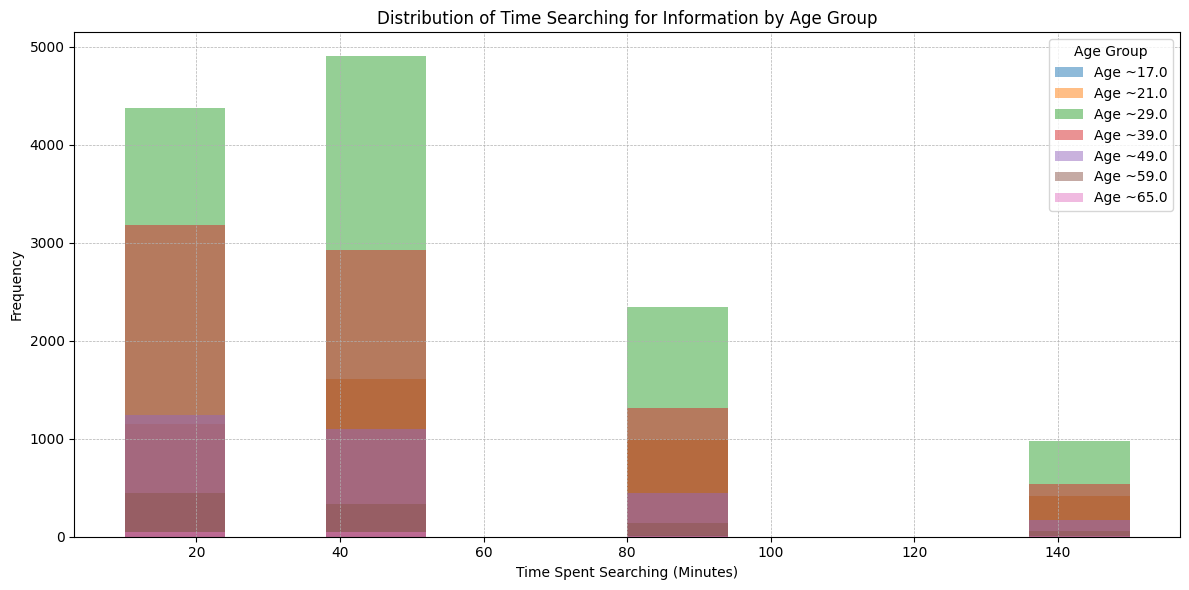

In [16]:
conn = sqlite3.connect('survey-data.sqlite')

# Step 1: Query needed columns
query = "SELECT Age, TimeSearching FROM main WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Step 2: Define age mapping and time searching mapping
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 65
}
time_mapping = {
    'Less than 15 minutes a day': 10,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}

# Apply mappings
df['AgeGroup'] = df['Age'].map(age_mapping)
df['TimeSearchingNum'] = df['TimeSearching'].map(time_mapping)

# Drop any rows that couldn't be mapped
df = df.dropna(subset=['AgeGroup', 'TimeSearchingNum'])

# Step 3: Define the order of age groups
age_groups = sorted(df['AgeGroup'].unique())

# Step 4: Plot histograms
plt.figure(figsize=(12, 6))

for age in age_groups:
    subset = df[df['AgeGroup'] == age]
    plt.hist(subset['TimeSearchingNum'], bins=10, alpha=0.5, label=f"Age ~{age}")

# Step 5: Customize plot
plt.title("Distribution of Time Searching for Information by Age Group")
plt.xlabel("Time Spent Searching (Minutes)")
plt.ylabel("Frequency")
plt.legend(title="Age Group")
plt.grid(True, linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


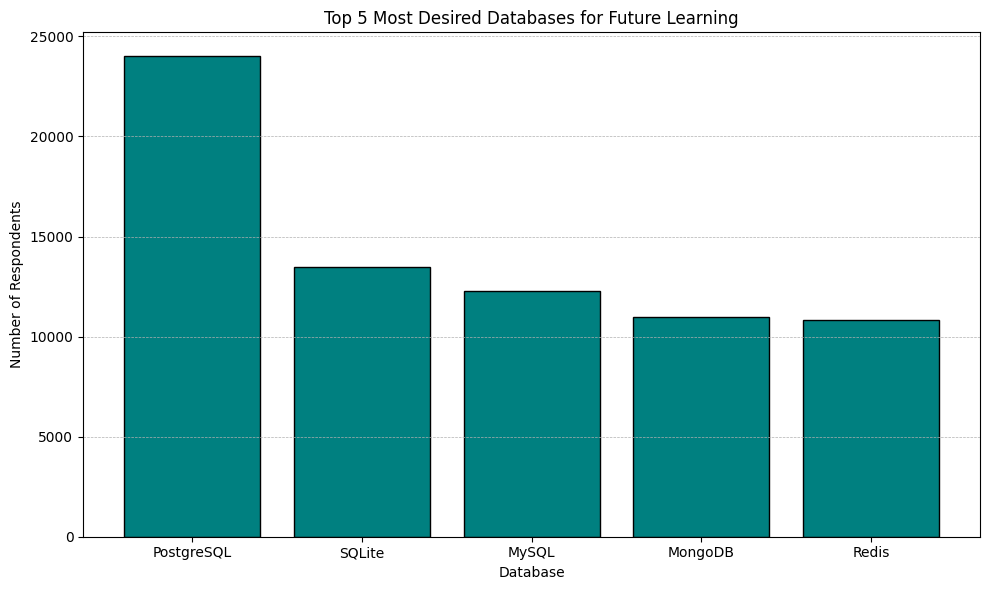

In [21]:

from collections import Counter

# Step 1: Connect and query
conn = sqlite3.connect('survey-data.sqlite')
query = "SELECT DatabaseWantToWorkWith FROM main WHERE DatabaseWantToWorkWith IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Step 2: Split and flatten multiple databases
all_databases = df['DatabaseWantToWorkWith'].dropna().str.split(';').sum()

# Step 3: Count frequencies
db_counts = Counter([db.strip() for db in all_databases])
top_5 = db_counts.most_common(5)

# Separate into names and counts
db_names, counts = zip(*top_5)

# Step 4: Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(db_names, counts, color='teal', edgecolor='black')

# Styling
plt.title("Top 5 Most Desired Databases for Future Learning")
plt.xlabel("Database")
plt.ylabel("Number of Respondents")
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


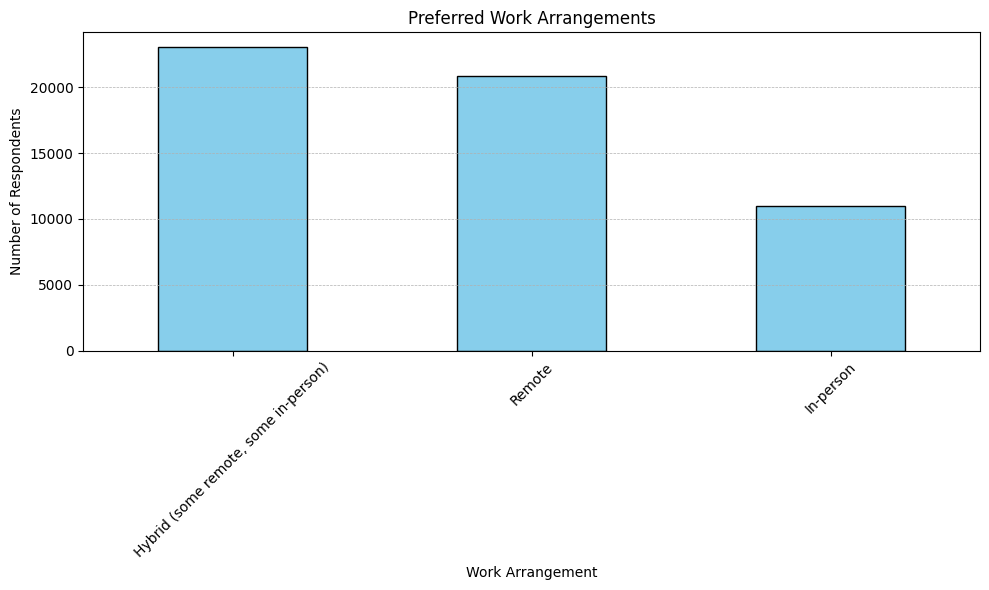

In [22]:

query = "SELECT RemoteWork FROM main WHERE RemoteWork IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Step 2: Count each type of work preference
work_pref_counts = df['RemoteWork'].value_counts()

# Step 3: Plot histogram
plt.figure(figsize=(10, 6))
work_pref_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Styling
plt.title("Preferred Work Arrangements")
plt.xlabel("Work Arrangement")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


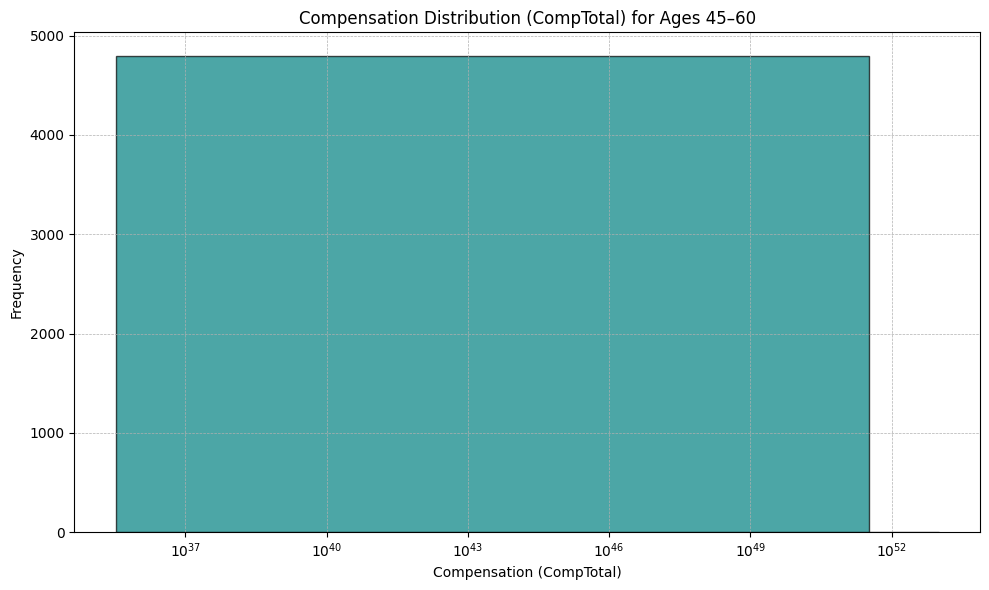

In [23]:

query = "SELECT Age, CompTotal FROM main WHERE Age IS NOT NULL AND CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Clean and transform data
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])

# Map age groups to representative values
age_mapping = {
    '45-54 years old': 49,
    '55-64 years old': 59
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Filter to age 45–60
df_filtered = df[df['AgeNumeric'].isin([49, 59])]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['CompTotal'], bins=30, color='teal', alpha=0.7, edgecolor='black')

# Styling
plt.title("Compensation Distribution (CompTotal) for Ages 45–60")
plt.xlabel("Compensation (CompTotal)")
plt.ylabel("Frequency")
plt.xscale('log')  # Use log scale if data is skewed
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


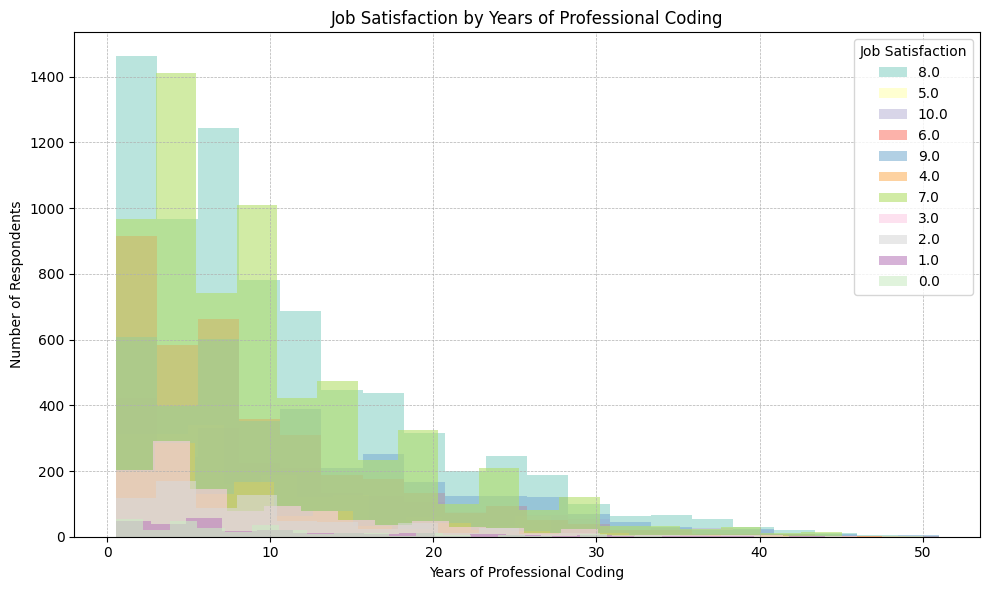

In [26]:

query = "SELECT YearsCodePro, JobSat FROM main WHERE YearsCodePro IS NOT NULL AND JobSat IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Clean YearsCodePro column
def convert_years(x):
    if x == "Less than 1 year":
        return 0.5
    elif x == "More than 50 years":
        return 51
    try:
        return float(x)
    except:
        return None

df['YearsCodePro'] = df['YearsCodePro'].apply(convert_years)
df = df.dropna(subset=['YearsCodePro'])

# Create a figure
plt.figure(figsize=(10, 6))

# Group by JobSat and plot each group as a histogram
job_sat_categories = df['JobSat'].unique()
colors = plt.cm.Set3.colors  # Use a colormap with distinct colors

for i, category in enumerate(job_sat_categories):
    subset = df[df['JobSat'] == category]
    plt.hist(subset['YearsCodePro'], bins=20, alpha=0.6, label=category, color=colors[i % len(colors)])

# Plot styling
plt.title("Job Satisfaction by Years of Professional Coding")
plt.xlabel("Years of Professional Coding")
plt.ylabel("Number of Respondents")
plt.legend(title="Job Satisfaction")
plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
